In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df= pd.read_csv('SalaryMulti.csv')

In [57]:
df.head()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687


In [58]:
df.shape

(1000, 5)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Experience            1000 non-null   int64  
 1   Team Lead Experience        1000 non-null   int64  
 2   Project Manager Experience  1000 non-null   int64  
 3   Certifications              1000 non-null   int64  
 4   Salary                      1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [60]:
df.describe()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.443000,3.197000,1.629000,2.049000,81405.671673
std,4.113596,3.119282,2.148482,1.423596,18256.125772
min,1.000000,0.000000,0.000000,0.000000,42298.056827
25%,4.000000,1.000000,0.000000,1.000000,66045.779366
50%,7.000000,2.000000,1.000000,2.000000,81241.246184
75%,11.000000,5.000000,3.000000,3.000000,95624.152980
max,14.000000,13.000000,13.000000,4.000000,126221.716735


C:\Users\chitr\AppData\Local\Temp\ipykernel_4352\2892061291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


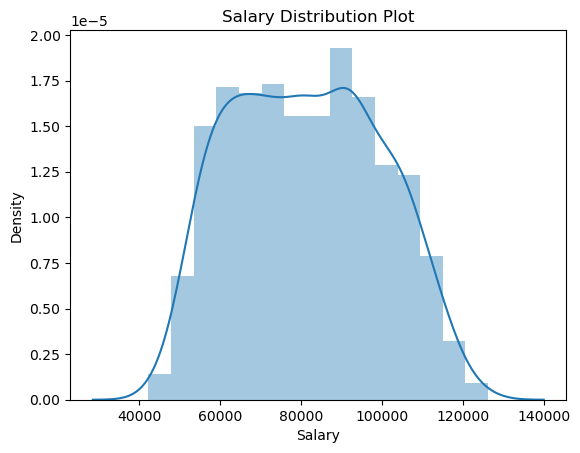

In [61]:
sns.distplot(df['Salary'])
plt.title('Salary Distribution Plot')
plt.show()

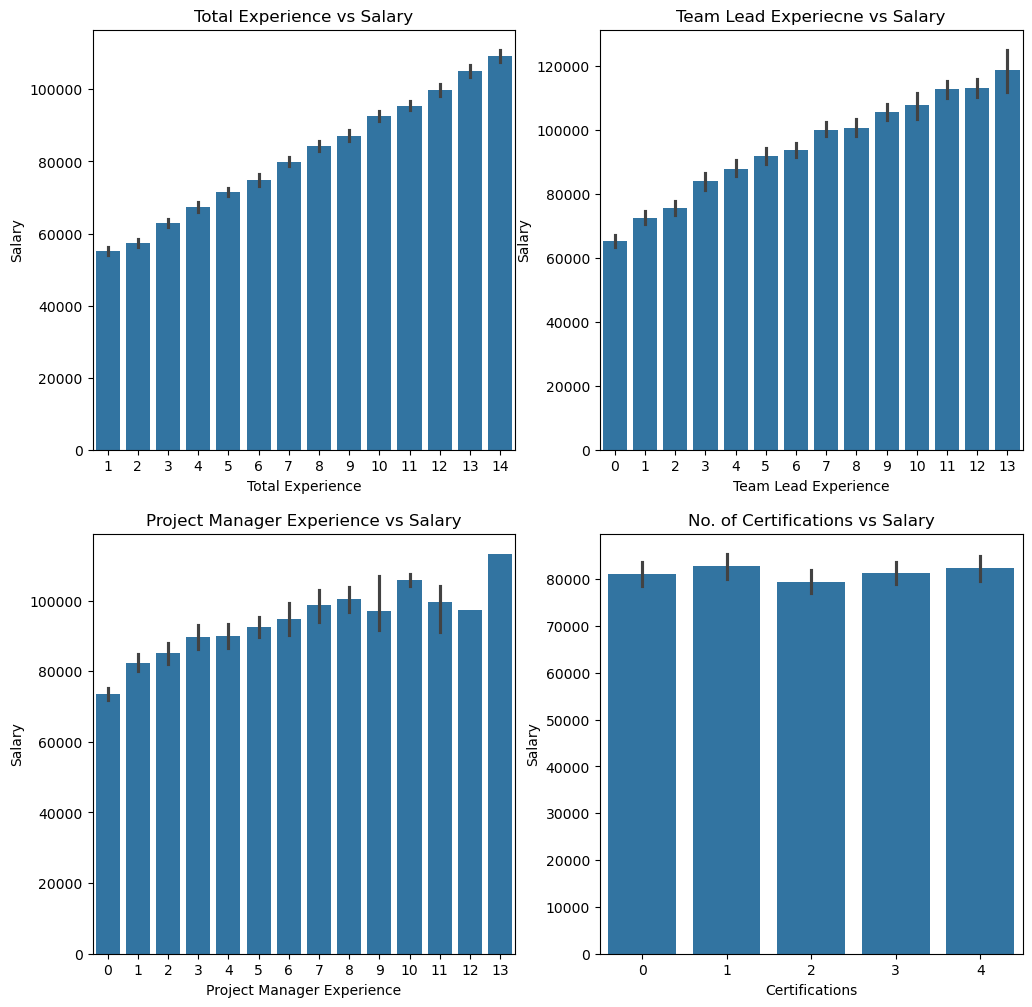

In [62]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.barplot(x=df['Total Experience'], y=df['Salary'])
plt.title('Total Experience vs Salary')

plt.subplot(2,2,2)
sns.barplot(x=df['Team Lead Experience'], y=df['Salary'])
plt.title('Team Lead Experiecne vs Salary')

plt.subplot(2,2,3)
sns.barplot(x=df['Project Manager Experience'], y=df['Salary'])
plt.title('Project Manager Experience vs Salary')

plt.subplot(2,2,4)
sns.barplot(x=df['Certifications'], y=df['Salary'])
plt.title('No. of Certifications vs Salary')

plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
X_train, X_test, y_train, y_test= train_test_split(
    df.drop(columns='Salary'), df['Salary'], test_size=0.2, random_state=42
)

In [65]:
pipe= Pipeline([
    ('Scaler', StandardScaler()),
    ('Regressor', LinearRegression())
])

In [66]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regressor', LinearRegression())])

In [67]:
y_pred= pipe.predict(X_test)

In [68]:
reg_model= pipe.named_steps['Regressor']

In [69]:
reg_model.coef_

array([12173.87847116,  5945.9735579 ,  2084.80449168,   528.20246339])

In [70]:
reg_model.intercept_

81816.28528238442

In [71]:
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.940614842359922


## Making Own Multiple Linear Regression class:

In [72]:
class Multiple_Linear_Regression:

    def __init__(self):
        
        self.coef = None
        self.intercept = None

    def fit(self, X_train, y_train):

        X_train= np.insert(X_train, 0, 1, axis=1)

        # Coefficient calculation
        beta= np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.coef= beta[1: ]
        self.intercept= beta[0]

    def predict(self, X_test):

        y_pred= np.dot(X_test, self.coef) + self.intercept
        return y_pred

In [73]:
pipe1= Pipeline([
    ('Scaler1', StandardScaler()),
    ('Regressor1', Multiple_Linear_Regression())
])

In [74]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('Scaler1', StandardScaler()),
                ('Regressor1',
                 <__main__.Multiple_Linear_Regression object at 0x0000022AA5620170>)])

In [75]:
y_pred1= pipe1.predict(X_test)

In [76]:
reg_model1= pipe1.named_steps['Regressor1']

In [77]:
reg_model1.coef

array([12173.87847116,  5945.9735579 ,  2084.80449168,   528.20246339])

In [78]:
reg_model1.intercept

81816.28528238443

In [79]:
print('R2 Score: ', r2_score(y_test, y_pred1))

R2 Score:  0.940614842359922
